# Predicting house prices using Linear Regression

This project works with house prices from the city of Ames, Iowa.

In [1]:
#package import
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [2]:
#function definitions
def select_features(df, use_dummy=True):
    #select values with less than 5% null values
    #replace with median
    null_percentages = df.isnull().sum() / len(df) * 100
    null_percentages_under_5 = null_percentages[null_percentages < 5].index
    null_numeric = df[null_percentages_under_5]._get_numeric_data().columns
    df[null_numeric] = df[null_numeric].fillna(df[null_numeric].median())
    
    #columns dropped due to redundancy, too few values, too many NaN, etc
    #a description can be found at:
    # https://s3.amazonaws.com/dq-content/307/data_description.txt 
    drops = ['Order', 'PID', 'Lot Frontage', 'MS SubClass', 'MS Zoning','Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Land Slope', 'Condition 1', 'Condition 2', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Foundation', 'Bsmt Qual','Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Kitchen AbvGr', 'Kitchen Qual', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt','Garage Finish', 'Garage Cars', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition']    
    df = df.drop(drops, axis = 1)
    
    #String columns requiring further processing
    string_columns = ['Lot Config', 'Neighborhood', 'Bldg Type', 'Exter Cond', 'Bsmt Cond', 'Functional']
    if use_dummy:
        dummy_cols = pd.get_dummies(houses[string_columns])
        df = pd.concat([df, dummy_cols], axis = 1)
    df = df.drop(string_columns, axis = 1)
    
    #drop values with a poor correlation
    poor_correlation = ['Lot Area', 'Overall Cond', '2nd Flr SF', 'Half Bath', 'Bedroom AbvGr']
    df = df.drop(poor_correlation, axis=1)
    
    return df

In [3]:
def train_and_test(df, k=0):
    #delimit data by feature selection
    df = select_features(df)
    
    #limit features to numeric, extract feature list
    #set last element as the target
    #remove target from features
    features = df.columns.tolist()
    target = df.columns[-1]
    features.remove(target)
    
    if(k == 0):
        #split into train and test
        train = df[:1460]
        test = df[1460:]
        #crete lr model
        lr = LinearRegression()
        lr.fit(train[features], train[target])
        predicted = lr.predict(test[features])
        
        #determine success of the model
        mse = mean_squared_error(test[target], predicted)
        rmse = mse ** 0.5
        return rmse
    
    elif(k == 1):
        #suffle
        df = shuffle(df)
        #split into train and test
        train = df[:1460]
        test = df[1460:]
        #crete lr model
        lr = LinearRegression()
        lr.fit(train[features], train[target])
        predicted = lr.predict(test[features])
        
        #determine success of the model
        mse = mean_squared_error(test[target], predicted)
        rmse = mse ** 0.5
        return rmse
    else:
        lr = LinearRegression()
        mse = abs(cross_val_score(lr,
                                  X=df[features],
                                  y=df[target],
                                  scoring='neg_mean_squared_error',
                                  cv=k
                                 ))
        rmse = mse ** 0.5
        return rmse

In [4]:
#read data
houses = pd.read_csv('AmesHousing.tsv', sep='\t')

In [5]:
houses.describe(include = 'all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930,2930,2930,2907,2907.000000,2930,2930,2930,2850,2850,2847,2850,2929.000000,2849,2929.000000,2929.000000,2929.000000,2930,2930,2930,2929,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930.000000,2930,2930.000000,1508,2773,2771.000000,2771,2929.000000,2929.000000,2771,2771,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,8,16,17,5,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,NaN,NaN,NaN,NaN,2321,2887,1026,1015,1752,NaN,1799,2549,1310,1283,2616,1906,859,NaN,2499,NaN,NaN,NaN,2885,1495,2734,2682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494,NaN,2728,NaN,744,1731,NaN,1231,NaN,NaN,2615,2665,2652,NaN,NaN,NaN,NaN,NaN,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.094881,5.563140,1971.356314,1984.266553,NaN,NaN,NaN,NaN,NaN,101.896801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.629566,NaN,49.722431,559.262547,1051.614544,NaN,NaN,NaN,NaN,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,NaN,6.443003,NaN,0.599317,NaN,NaN,1978.132443,NaN,1.766815,472.819734,NaN,NaN,NaN,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.411026,1.111537,30.245361,20.860286,NaN,NaN,NaN,NaN,NaN,179.112611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.590839,NaN,169.168476,439.494153,440.615067,NaN,NaN,NaN,NaN,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,NaN,1.572964,NaN,0.647921,NaN,NaN,25.528411,NaN,0.760566,215.046549,NaN,NaN,NaN,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.

In [6]:
houses.isnull().sum().sort_values(ascending=False) / len(houses) *100

Pool QC            99.556314
Misc Feature       96.382253
Alley              93.242321
Fence              80.477816
Fireplace Qu       48.532423
Lot Frontage       16.723549
Garage Qual         5.426621
Garage Yr Blt       5.426621
Garage Cond         5.426621
Garage Finish       5.426621
Garage Type         5.358362
Bsmt Exposure       2.832765
BsmtFin Type 2      2.764505
BsmtFin Type 1      2.730375
Bsmt Cond           2.730375
Bsmt Qual           2.730375
Mas Vnr Type        0.784983
Mas Vnr Area        0.784983
Bsmt Full Bath      0.068259
Bsmt Half Bath      0.068259
Garage Area         0.034130
Garage Cars         0.034130
Total Bsmt SF       0.034130
Bsmt Unf SF         0.034130
BsmtFin SF 2        0.034130
BsmtFin SF 1        0.034130
Electrical          0.034130
Exterior 2nd        0.000000
Exterior 1st        0.000000
Roof Matl           0.000000
Roof Style          0.000000
Year Remod/Add      0.000000
Year Built          0.000000
SalePrice           0.000000
Overall Cond  

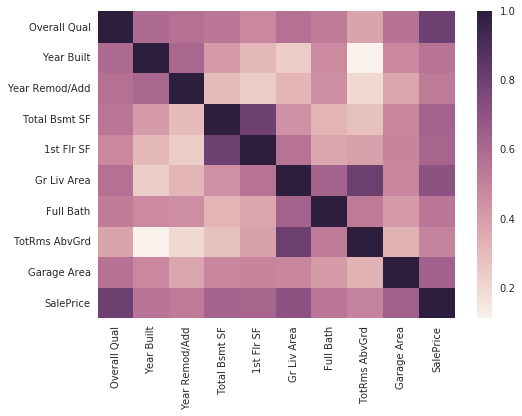

In [7]:
sns.heatmap(select_features(houses, False).corr())

In [8]:
print(train_and_test(houses, k=0))
print(train_and_test(houses, k=1))
print(train_and_test(houses, k=5))

0.036885555678189366
0.03688555567848559
[2.71256033e-12 5.37243705e-13 8.90271313e-12 4.57310252e-12
 4.24692729e-12]
